In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

/var/folders/gp/n7ttdtg56pg0s6ydv9zj9wth0000gn/T/ipykernel_17339/1543584708.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
def printMetrics(test, pred): 
    cm = confusion_matrix(test,pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
    cm_display.plot()
    print(f"accuracy: {accuracy_score(test, pred)}")
    print(f"f1_score: {f1_score(test, pred)}")
    print(f"precision_score: {precision_score(test, pred)}")
    print(f"recall: {recall_score(test, pred)}")
    print(f"roc_auc:{roc_auc_score(test,pred)}")

In [3]:
df = pd.read_csv("datasource/bank_data_after_fe.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3616 non-null   float64
 1   marital            3616 non-null   float64
 2   education          3616 non-null   float64
 3   default            3616 non-null   int64  
 4   balance            3616 non-null   float64
 5   housing            3616 non-null   int64  
 6   loan               3616 non-null   int64  
 7   duration           3616 non-null   float64
 8   campaign           3616 non-null   int64  
 9   pdays              3616 non-null   int64  
 10  previous           3616 non-null   int64  
 11  poutcome           3616 non-null   float64
 12  day_of_the_year    3616 non-null   int64  
 13  y                  3616 non-null   int64  
 14  job_admin.         3616 non-null   int64  
 15  job_blue-collar    3616 non-null   int64  
 16  job_entrepreneur   3616 

In [5]:
categorical_values= df.drop(columns=["day_of_the_year", "y", "pdays"]).select_dtypes(exclude=np.float64).columns.values.tolist()

In [6]:
target_value = "y"

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=target_value),
    df[target_value],
    test_size=0.2,
    stratify=df[target_value],
    random_state=42,
)

In [7]:
from sklearn.utils import compute_class_weight


weights = compute_class_weight(class_weight="balanced",classes= np.unique(y_train), y = y_train)
weights = {0:weights[0], 1:weights[1]}

In [8]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

estimators = [("LogisticRegression", LogisticRegression(max_iter=1000,solver="liblinear", penalty="l1", class_weight=weights)),
              #("DecisionTree", DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, class_weight=weights)),
              ("Gradient", GradientBoostingClassifier(learning_rate=0.13, min_samples_split=6)),
              ("RandomForestClassifier",  RandomForestClassifier(n_estimators = 1000, n_jobs = -1)),
              ("XGBClassifier", XGBClassifier(n_estimators=1000, learning_rate=0.3, booster="gbtree", max_depth=5))]

accuracy: 0.9046961325966851
f1_score: 0.6187845303867403
precision_score: 0.5714285714285714
recall: 0.6746987951807228
roc_auc:0.8045880871379433


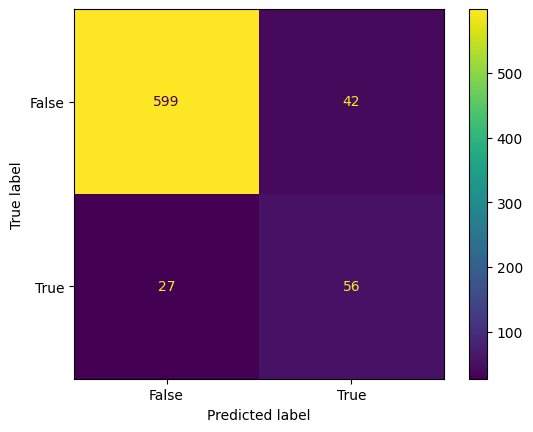

In [9]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, 
                         final_estimator=LogisticRegression(solver="liblinear", penalty="l1", class_weight={0:1, 1:2.6}),
                         cv = 10)#1,2
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
printMetrics(y_test, y_hat)

for i in range (10):
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    printMetrics(y_test, y_hat)

accuracy: 0.7914364640883977
f1_score: 0.49498327759197325
precision_score: 0.3425925925925926
recall: 0.891566265060241
roc_auc:0.8350187019528974


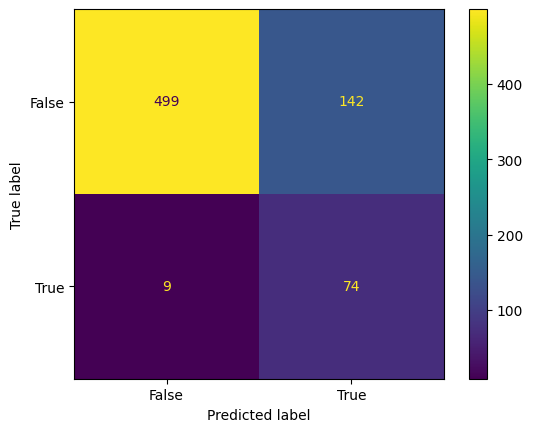

In [10]:
from imblearn.ensemble import BalancedRandomForestClassifier
from matplotlib.pyplot import cla

model = BalancedRandomForestClassifier(n_estimators=100, sampling_strategy="not minority", replacement=True, bootstrap=False)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
printMetrics(y_test, y_hat)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

estimators = [("LogisticRegression", LogisticRegression(max_iter=1000,solver="liblinear", penalty="l1", class_weight=weights)),
              #("DecisionTree", DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, class_weight=weights)),
              ("Gradient", GradientBoostingClassifier(learning_rate=0.13, min_samples_split=6)),
              ("RandomForestClassifier",  RandomForestClassifier(n_estimators = 1000, n_jobs = -1)),
              ("XGBClassifier", XGBClassifier(n_estimators=1000, learning_rate=0.3, booster="gbtree", max_depth=5))]

accuracy: 0.8660220994475138
f1_score: 0.49214659685863876
precision_score: 0.4351851851851852
recall: 0.5662650602409639
roc_auc:0.7355506268443509


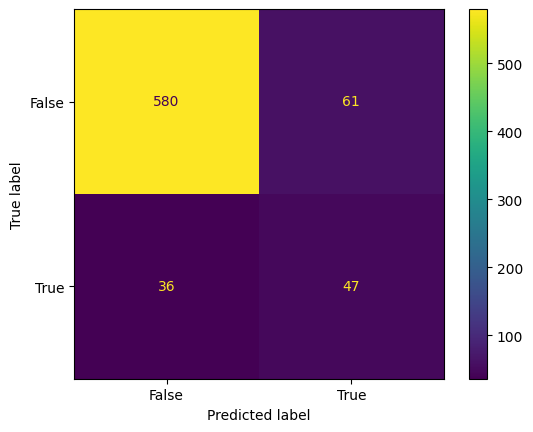

In [12]:
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline

sm = SMOTENC(k_neighbors=3, 
             sampling_strategy="not majority", 
             categorical_features=categorical_values)

clf = StackingClassifier(estimators=estimators, 
                         final_estimator=LogisticRegression(solver="liblinear", penalty="l1", class_weight={0:1, 1:2.6}),
                         cv = 10)

pipe = Pipeline([("SMOTENC", sm), 
                 ("estimator", clf)])
pipe.fit(X_train,y_train)
y_hat = pipe.predict(X_test)
printMetrics(y_test,y_hat)

accuracy: 0.8591160220994475
f1_score: 0.5233644859813084
precision_score: 0.42748091603053434
recall: 0.6746987951807228
roc_auc:0.7788470574967576


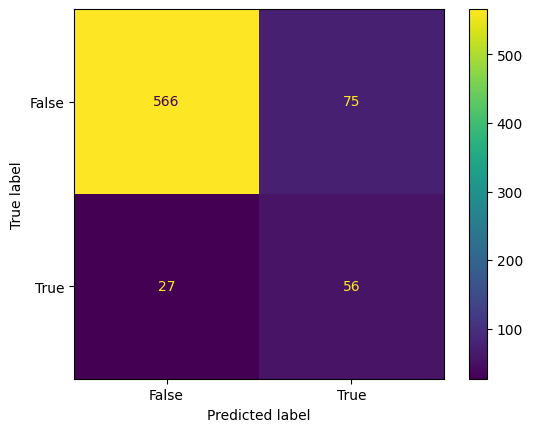

In [13]:
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC

sm = SMOTENC(k_neighbors=3, 
             sampling_strategy="not majority", 
             categorical_features=categorical_values)

clf = SVC(kernel="linear")


pipe = Pipeline([("SMOTENC", sm), 
                 ("estimator", clf)])
pipe.fit(X_train,y_train)
y_hat = pipe.predict(X_test)
printMetrics(y_test,y_hat)

accuracy: 0.8218232044198895
f1_score: 0.4860557768924303
precision_score: 0.3630952380952381
recall: 0.7349397590361446
roc_auc:0.7840065409845309


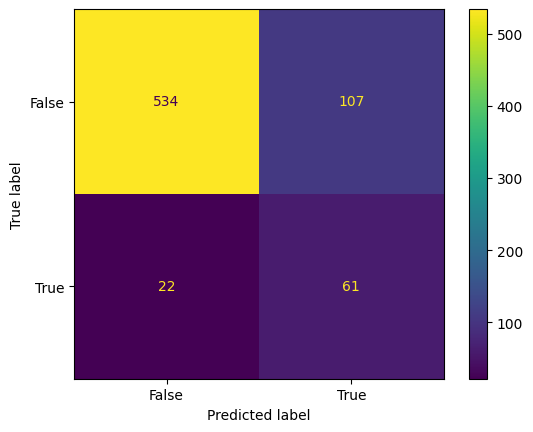

In [14]:
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline

sm = SMOTENC(k_neighbors=3, 
             sampling_strategy="not majority", 
             categorical_features=categorical_values)

clf =  RandomForestClassifier(n_estimators = 1000, n_jobs = -1,max_depth=3)

pipe = Pipeline([("SMOTENC", sm), 
                 ("estimator", clf)])
pipe.fit(X_train,y_train)
y_hat = pipe.predict(X_test)
printMetrics(y_test,y_hat)


accuracy: 0.9005524861878453
f1_score: 0.5068493150684932
precision_score: 0.5873015873015873
recall: 0.4457831325301205
roc_auc:0.702610755032611


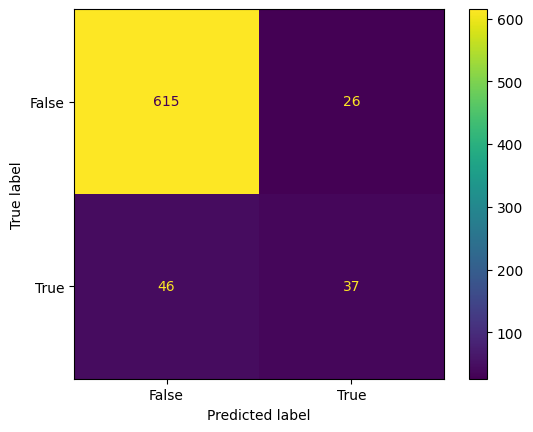

In [15]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC

sm = NeighbourhoodCleaningRule()

clf = SVC(kernel="linear")


pipe = Pipeline([("SMOTENC", sm), 
                 ("estimator", clf)])
pipe.fit(X_train,y_train)
y_hat = pipe.predict(X_test)
printMetrics(y_test,y_hat)

accuracy: 0.9019337016574586
f1_score: 0.2828282828282828
precision_score: 0.875
recall: 0.1686746987951807
roc_auc:0.5827772869950942


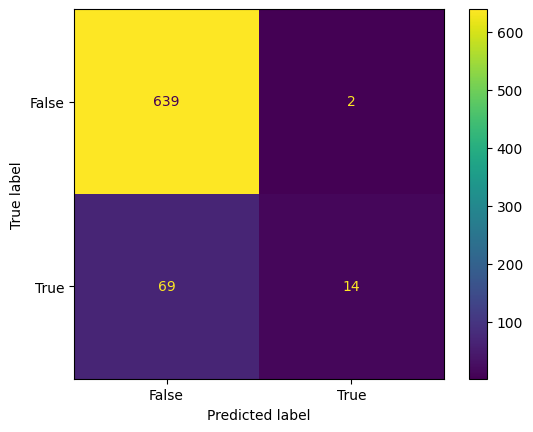

In [16]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC

sm = NeighbourhoodCleaningRule()

clf = RandomForestClassifier(n_estimators = 1000, n_jobs = -1,max_depth=3)


pipe = Pipeline([("SMOTENC", sm), 
                 ("estimator", clf)])
pipe.fit(X_train,y_train)
y_hat = pipe.predict(X_test)
printMetrics(y_test,y_hat)

accuracy: 0.8093922651933702
f1_score: 0.46511627906976744
precision_score: 0.34285714285714286
recall: 0.7228915662650602
roc_auc:0.7717421949890044


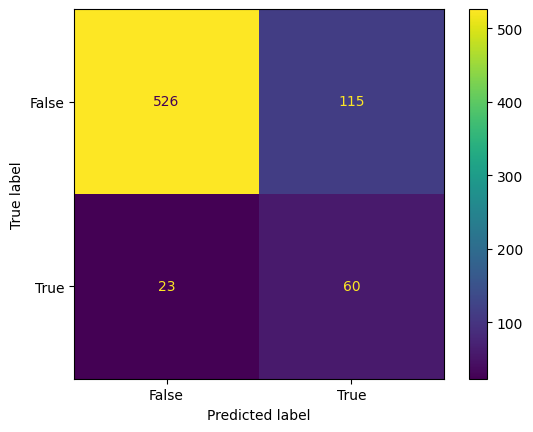

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import NearMiss

pipe = Pipeline([("us", SMOTENC(k_neighbors=3, sampling_strategy="not majority", categorical_features=categorical_values)),
                 ("KNN", KNeighborsClassifier(n_neighbors=5, weights="distance"))])
pipe.fit(X_train,y_train)
y_hat = pipe.predict(X_test)
printMetrics(y_test,y_hat)

In [18]:
estimators = [("LogisticRegression", LogisticRegression(max_iter=1000,solver="liblinear", penalty="l1", class_weight=weights)),
              ("DecisionTree", DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, class_weight=weights)),
              ("Gradient", GradientBoostingClassifier(learning_rate=0.13, min_samples_split=6)),
              ("RandomForestClassifier",  RandomForestClassifier(n_estimators = 1000, n_jobs = -1)),
              ("XGBClassifier", XGBClassifier(n_estimators=1000, learning_rate=0.3, booster="gbtree", max_depth=5)),
              ('BalancedRandomForestClassifier', BalancedRandomForestClassifier(bootstrap=False, replacement=True, sampling_strategy='not minority'))]

accuracy: 0.8950276243093923
f1_score: 0.6082474226804123
precision_score: 0.5315315315315315
recall: 0.7108433734939759
roc_auc:0.8148600642820893


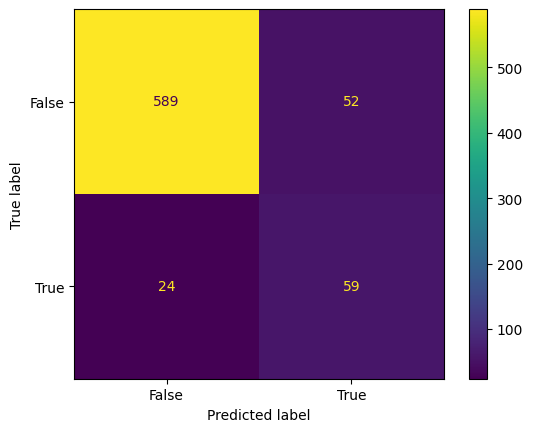

In [19]:
clf = StackingClassifier(estimators=estimators, 
                         final_estimator=LogisticRegression(solver="liblinear", penalty="l1", class_weight={0:1, 1:2.6}),
                         cv = 10)#1,2
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
printMetrics(y_test, y_hat)

In [20]:
estimators = [("LogisticRegression", LogisticRegression(max_iter=10000,penalty=None)),
              #("DecisionTree", DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, class_weight=weights)),
              ("Gradient", GradientBoostingClassifier(learning_rate=0.13, min_samples_split=6)),
              #("RandomForestClassifier",  RandomForestClassifier(n_estimators = 1000, n_jobs = -1, class_weight=weights)),
              ("SVC", SVC(class_weight="balanced", kernel="linear", decision_function_shape="ovr")),
              ("XGBClassifier", XGBClassifier(n_estimators=1000, learning_rate=0.3, booster="gbtree", max_depth=5)),
              ('BalancedRandomForestClassifier', BalancedRandomForestClassifier(bootstrap=False, replacement=True, sampling_strategy='not minority'))]

accuracy: 0.8204419889502762
f1_score: 0.5255474452554745
precision_score: 0.3769633507853403
recall: 0.8674698795180723
roc_auc:0.8409112268105182


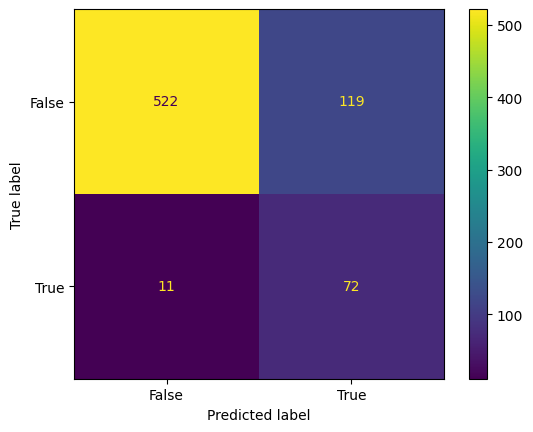

In [21]:
clf = StackingClassifier(estimators=estimators, 
                         final_estimator=LogisticRegression(solver="liblinear", penalty="l1", class_weight="balanced"),
                         cv = 10)#1,2
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
printMetrics(y_test, y_hat)

In [31]:
estimators = [("LogisticRegression", LogisticRegression(max_iter=10000,penalty=None)),
              #("DecisionTree", DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, class_weight=weights)),
              ("Gradient", GradientBoostingClassifier(random_state=42, learning_rate=0.13, min_samples_split=6)),
              #("RandomForestClassifier",  RandomForestClassifier(random_state= 42,n_estimators = 1000, n_jobs = -1, class_weight="balanced")),
              ("XGBClassifier", XGBClassifier(random_state=42, n_estimators=1000, learning_rate=0.3, booster="gbtree", max_depth=5)),
              ("SVC", SVC()),
              ("Bayes", GaussianNB())]

accuracy: 0.9046961325966851
f1_score: 0.5868263473053892
precision_score: 0.5833333333333334
recall: 0.5903614457831325
roc_auc:0.7678796308478846


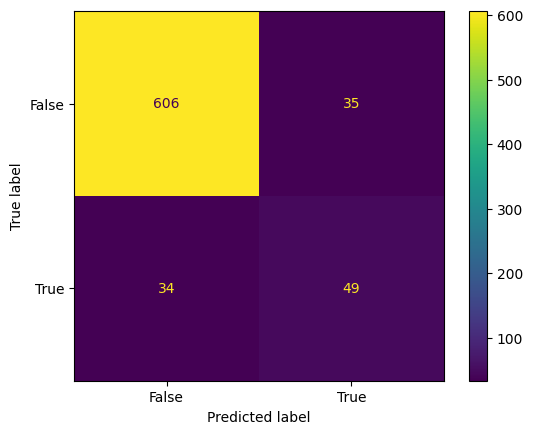

In [32]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, 
                         final_estimator=LogisticRegression(solver="liblinear", 
                                                            penalty="l1", 
                                                            class_weight={0:1, 1:2.6}),
                         cv=10)#1,2
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
printMetrics(y_test, y_hat)